# TD MAUP - M2 IGAST

## Compréhension du phénomène à travers un cas pratique

Nous allons maintenant illustrer le phénomène du MAUP en analysant le jeu de données sur le taux de boisement en France à différentes échelles géographiques.

---


# 1 - Chargement et structure des données

L'objectif de cette section est de charger les données géographiques sur le taux de boisement en France à différentes échelles d'agrégation :

- **Communes**
- **EPCI** (Établissements Publics de Coopération Intercommunale)
- **Départements**
- **Anciennes régions** (avant 2016)
- **Nouvelles régions** (après 2016)


## 1.1 - Communes : *com_foret*

> `📝` Chargez les données pour les communes dans un dataframe *com_foret*
>
> `📝` Calculez le taux de boisement dans une nouvelle colonne *txbois* du dataframe
>
> `📝` Examinez la structure du dataframe avec `head()`, `info()` ou `describe()`


In [2]:
# On utilise geopandas pour charger des géométries dans un GeoDataFrame
# https://geopandas.org/
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mapclassify as mc
import numpy as np

# Configuration de seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Chemin vers les données communes
url_com = "https://github.com/fbxyz/ENSG_IGAST/raw/master/data/MAUP_COM_FORET_3857.geojson"

# Charger le fichier GeoJSON des communes
com_foret = gpd.read_file(url_com)

# On change la projection vers Lambert-93 (EPSG:2154)
com_foret = com_foret.to_crs(epsg=2154)

# Calculer le taux de boisement
com_foret['txbois'] = round((com_foret['surface_foret'] / com_foret['surface_com']) * 100, 1)

# Afficher les premières lignes
print(com_foret.head())


  insee_dep insee_com insee_epci  surface_com  surface_foret  txbois  \
0        57     57660  245700372        360.1           26.6     7.4   
1        57     57537  245700372        503.3          218.6    43.4   
2        57     57069  200067650        553.0          183.4    33.2   
3        57     57638  245700372        404.9          205.2    50.7   
4        57     57460  200067650        527.6          198.3    37.6   

   insee_old_reg  insee_reg                                           geometry  
0             41         44  POLYGON ((988031.182 6907921.772, 987265.021 6...  
1             41         44  POLYGON ((982995.212 6908239.591, 982080.308 6...  
2             41         44  POLYGON ((965355.98 6912175.257, 965908.774 69...  
3             41         44  POLYGON ((985759.256 6907385.167, 986364.442 6...  
4             41         44  POLYGON ((965434.878 6911098.752, 965828.831 6...  


## 1.2 - EPCI : *epci_foret*

> `📝` Chargez les données pour les EPCI dans un dataframe *epci_foret*
>
> `📝` Calculez le taux de boisement dans une nouvelle colonne *txbois* du dataframe
>
> `📝` Examinez la structure du dataframe


In [ ]:
# Chemin vers les données EPCI
url_epci = "https://github.com/fbxyz/ENSG_IGAST/raw/master/data/MAUP_EPCI_FORET_3857.geojson"

# TODO: Charger les données EPCI avec gpd.read_file()
# TODO: Transformer en Lambert-93 (epsg=2154)
# TODO: Calculer le taux de boisement si nécessaire
# TODO: Afficher les premières lignes


## 1.3 - Départements : *dep_foret*

> `📝` Chargez les données pour les départements dans un dataframe *dep_foret*
>
> `📝` Calculez le taux de boisement dans une nouvelle colonne *txbois* du dataframe
>
> `📝` Examinez la structure du dataframe


In [ ]:
# Chemin vers les données des départements
url_dep = "https://github.com/fbxyz/ENSG_IGAST/raw/master/data/MAUP_DEP_FORET_3857.geojson"

# TODO: Charger les données départements
# TODO: Transformer en Lambert-93
# TODO: Calculer le taux de boisement si nécessaire
# TODO: Afficher les premières lignes


## 1.4 - Anciennes régions : *oldreg_foret*

> `📝` Chargez les données pour les anciennes régions dans un dataframe *oldreg_foret*
>
> `📝` Calculez le taux de boisement dans une nouvelle colonne *txbois* du dataframe
>
> `📝` Examinez la structure du dataframe


In [ ]:
# Chemin vers les données des anciennes régions
url_oldreg = "https://github.com/fbxyz/ENSG_IGAST/raw/master/data/MAUP_OLDREG_FORET_3857.geojson"

# TODO: Charger les données anciennes régions
# TODO: Transformer en Lambert-93
# TODO: Calculer le taux de boisement si nécessaire
# TODO: Afficher les premières lignes


## 1.5 - Nouvelles régions : *reg_foret*

> `📝` Chargez les données pour les nouvelles régions dans un dataframe *reg_foret*
>
> `📝` Calculez le taux de boisement dans une nouvelle colonne *txbois* du dataframe
>
> `📝` Examinez la structure du dataframe


In [ ]:
# Chemin vers les données des nouvelles régions
url_reg = "https://github.com/fbxyz/ENSG_IGAST/raw/master/data/MAUP_REG_FORET_3857.geojson"

# TODO: Charger les données nouvelles régions
# TODO: Transformer en Lambert-93
# TODO: Calculer le taux de boisement si nécessaire
# TODO: Afficher les premières lignes


---

# 2 - Cartographie des données

Pour illustrer les différents effets du MAUP, vous allez cartographier le même taux de boisement en France, mais à différents maillages.

La première carte à la commune est montrée en exemple.

## Objectif :

> `📝` Créer une carte choroplèthe pour chaque niveau d'agrégation
>
> `📝` Appliquer vos connaissances sur la discrétisation pour un rendu efficace
>
> `📝` Observer les différences de représentation spatiale
>
> `📝` Consultez l'aide de mapclassify si besoin : <https://pysal.org/mapclassify/>


## 2.1 - Carte par communes


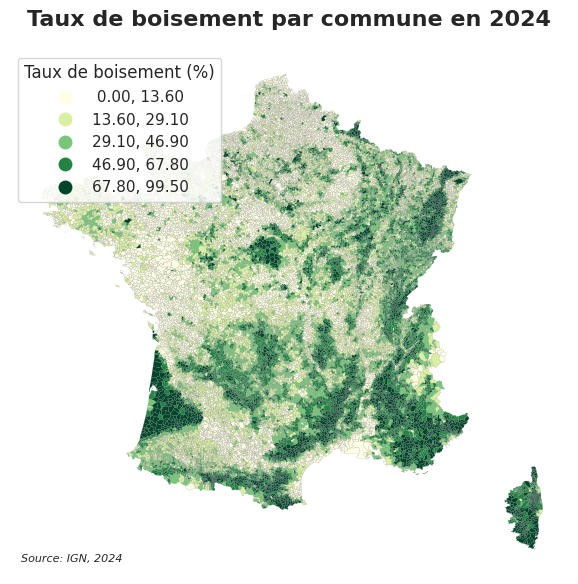

In [4]:
# ÉTAPE 1 : Créer une figure avec matplotlib
# figsize=(15, 12) définit la taille de la carte en pouces (largeur, hauteur)
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

# ÉTAPE 2 : Classifier les données avec Fisher-Jenks (Natural Breaks)
# Cette méthode minimise la variance intra-classe et maximise la variance inter-classe
# k=5 : on crée 5 classes de valeurs
classifier = mc.FisherJenks(com_foret['txbois'], k=5)

# ÉTAPE 3 : Créer la carte choroplèthe avec geopandas
com_foret.plot(
    column='txbois',                              # Variable à cartographier
    cmap='YlGn',                                  # Palette de couleurs (Yellow-Green)
    classification_kwds={'bins': classifier.bins}, # Utiliser les classes calculées
    scheme='user_defined',                        # Méthode de discrétisation personnalisée
    legend=True,                                  # Afficher la légende
    ax=ax,                                        # Utiliser l'axe créé précédemment
    edgecolor='grey',                             # Couleur des contours
    linewidth=0.1,                                # Épaisseur des contours (en points)
    legend_kwds={                                 # Paramètres de la légende
        'title': 'Taux de boisement (%)',        # Titre de la légende
        'loc': 'upper left',                      # Position de la légende
        'frameon': True                           # Afficher un cadre autour de la légende
    }
)

# ÉTAPE 4 : Personnaliser la carte
ax.set_title('Taux de boisement par commune en 2024', fontsize=16, fontweight='bold')
ax.axis('off')  # Masquer les axes x et y
ax.text(0.02, 0.02, 'Source: IGN, 2024',
        transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', style='italic')

plt.tight_layout()  # Ajuster automatiquement les espacements
plt.show()


## 2.2 - Carte par EPCI

> `📝` En vous aidant de l'exemple précédent, cartographiez le taux de boisement pour les EPCI
>
> `📝` Comparez visuellement avec la carte des communes


In [ ]:
# TODO: Créer la carte pour les EPCI
# Inspirez-vous de l'exemple des communes ci-dessus


## 2.3 - Carte par Départements

> `📝` Cartographiez le taux de boisement pour les départements


In [ ]:
# TODO: Créer la carte pour les départements


## 2.4 - Carte par Anciennes régions

> `📝` Cartographiez le taux de boisement pour les anciennes régions


In [ ]:
# TODO: Créer la carte pour les anciennes régions


## 2.5 - Carte par Nouvelles régions

> `📝` Cartographiez le taux de boisement pour les nouvelles régions


In [ ]:
# TODO: Créer la carte pour les nouvelles régions


## 2.6 - Questions

> `📝` **Question 1 :** Qu'observez-vous sur la répartition du taux de boisement à différentes échelles d'agrégation ?
>
> `📝` **Question 2 :** Les zones identifiées comme fortement boisées restent-elles les mêmes selon l'échelle ?
>
> `📝` **Question 3 :** Quel niveau d'agrégation vous semble le plus pertinent pour étudier le taux de boisement ? Pourquoi ?


**Vos réponses ici :**

1.
2.
3.



---

# 3 - Analyse univariée

En utilisant les acquis des cours précédents, réalisez l'analyse univariée du taux de boisement pour chaque maillage.

## Objectifs :

> `📝` Calculez les valeurs centrales (moyenne, médiane) et les paramètres de dispersion (écart-type, min, max, quartiles)
>
> `📝` Créez des boxplots pour comparer les distributions
>
> `📝` Analysez l'évolution des statistiques selon l'échelle d'agrégation


## 3.1 - Communes

Exemple d'analyse pour les communes :


In [ ]:
# Statistiques descriptives pour les communes
print(com_foret['txbois'].describe())

# Calcul de l'écart-type
print(f"\nÉcart-type : {com_foret['txbois'].std():.2f}")

# Boxplot avec seaborn
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(y=com_foret['txbois'], ax=ax, color='lightgreen')
ax.set_title('Distribution du taux de boisement par commune', fontsize=14)
ax.set_ylabel('Taux de boisement (%)')
ax.set_ylim(0, 100)  # Fixer les limites de l'axe y pour permettre la comparaison entre échelles
plt.tight_layout()
plt.show()

## 3.2 - EPCI

> `📝` Réalisez l'analyse univariée pour les EPCI


In [ ]:
# TODO: Statistiques descriptives pour EPCI
# TODO: Écart-type
# TODO: Boxplot


## 3.3 - Départements

> `📝` Réalisez l'analyse univariée pour les départements


In [ ]:
# TODO: Statistiques descriptives pour départements
# TODO: Écart-type
# TODO: Boxplot


## 3.4 - Anciennes régions

> `📝` Réalisez l'analyse univariée pour les anciennes régions


In [ ]:
# TODO: Statistiques descriptives pour anciennes régions
# TODO: Écart-type
# TODO: Boxplot


## 3.5 - Nouvelles régions

> `📝` Réalisez l'analyse univariée pour les nouvelles régions


In [ ]:
# TODO: Statistiques descriptives pour nouvelles régions
# TODO: Écart-type
# TODO: Boxplot


## 3.6 - Comparaison visuelle

> `📝` **Bonus :** Créez un graphique comparatif avec tous les boxplots côte à côte


In [ ]:
# ÉTAPE 1 : Créer un dictionnaire avec toutes les données
# Cela permet de regrouper toutes les séries de taux de boisement en un seul endroit
data_dict = {
    'Communes': com_foret['txbois'],
    'EPCI': epci_foret['txbois'],
    'Départements': dep_foret['txbois'],
    'Anciennes_régions': oldreg_foret['txbois'],
    'Nouvelles_régions': reg_foret['txbois']
}

# ÉTAPE 2 : Créer un tableau de synthèse des statistiques
# On utilise des list comprehensions pour calculer les stats sur chaque série
summary_stats = pd.DataFrame({
    'Maillage': list(data_dict.keys()),
    'Moyenne': [data.mean() for data in data_dict.values()],
    'Médiane': [data.median() for data in data_dict.values()],
    'Écart-type': [data.std() for data in data_dict.values()]
})

print("=== TABLEAU COMPARATIF DES STATISTIQUES ===")
print(summary_stats)

# ÉTAPE 3 : Créer un DataFrame au format "long" pour seaborn
# pd.concat() empile verticalement toutes les séries
# names=['Niveau', 'index'] donne des noms aux colonnes de l'index
# reset_index() transforme l'index en colonnes normales
df_long = pd.concat(data_dict, names=['Niveau', 'index']).reset_index(name='Taux de boisement (%)')

# On garde seulement les colonnes utiles pour le graphique
df_long = df_long[['Niveau', 'Taux de boisement (%)']]

print("\n=== APERÇU DU DATAFRAME LONG ===")
print(df_long.head(10))
print(f"\nNombre total de lignes : {len(df_long)}")

# ÉTAPE 4 : Créer les boxplots comparatifs
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.boxplot(data=df_long, x='Niveau', y='Taux de boisement (%)', ax=ax, palette='Set2')
ax.set_title('Comparaison du taux de boisement selon le maillage', fontsize=14, fontweight='bold')
ax.set_xlabel('Maillage', fontsize=12)
ax.set_ylabel('Taux de boisement (%)', fontsize=12)
ax.set_ylim(0, 100)  # Fixer les limites de l'axe y pour faciliter la comparaison
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3.7 - Questions

> `📝` **Question 1 :** Que constatez-vous sur l'évolution de la moyenne du taux de boisement selon l'échelle ?
>
> `📝` **Question 2 :** Comment évolue la dispersion (écart-type) selon le niveau d'agrégation ? Pourquoi ?
>
> `📝` **Question 3 :** Quel lien faites-vous entre ces observations et le MAUP ?


**Vos réponses ici :**

1.
2.
3.
4.



---

# Fin du TD

## Pour aller plus loin

Vous pouvez explorer :

1. **L'autocorrélation spatiale** : Comment évolue-t-elle selon l'échelle d'agrégation ? (indices de Moran, Geary) - Utilisez `esda` de PySAL

2. **Les corrélations bivariées** : Si vous avez d'autres variables (population, revenus), comment évoluent les corrélations avec le taux de boisement selon l'échelle ?

3. **Le lissage spatial** : Appliquez un lissage spatial pour vous affranchir des découpages administratifs - Utilisez `scipy.ndimage` ou KernelDensity de sklearn

4. **Différentes méthodes d'agrégation** : Testez différentes méthodes (moyennes pondérées, médianes, etc.)

N'oubliez pas de consulter la présentation du cours pour réviser les concepts théoriques du MAUP !

